In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from matplotlib import pyplot as plt
%matplotlib inline

,SNC.TO,TD,^BVSP,VALE3.SA
count,495.000000,486.000000,473.000000,473.000000
mean,40.195659,54.331382,90932.198104,49.068031
std,14.045450,2.294461,10659.542540,4.684691
min,15.488437,45.834755,69815.000000,38.779011
25%,26.015921,53.115732,83118.000000,46.490002
50%,45.897449,54.250505,89710.000000,49.660000
75%,53.429029,55.958183,99469.000000,52.000000
max,59.623077,58.293087,113134.703125,62.200001


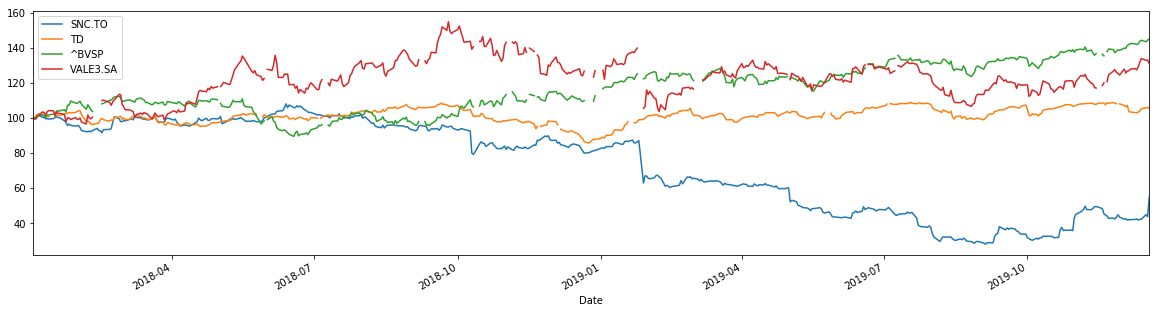

In [23]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass
(df / df.iloc[0] * 100).plot(figsize=(20,5))
df.describe()

In [24]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [25]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA
Date,,,,
2019-12-12,0.011641,0.007573,0.011077,0.021379
2019-12-13,0.000429,0.011786,0.003248,0.015182
2019-12-16,0.060272,0.004958,-0.005961,-0.007843
2019-12-17,-0.027399,0.002294,0.006414,0.001499
2019-12-18,0.229096,-0.006950,0.004595,-0.014899


In [26]:
std_returns * 100

SNC.TO      3.019116
TD          0.852687
^BVSP       1.275346
VALE3.SA    1.994636
dtype: float64

In [27]:
var_returns * 100

SNC.TO      1.441218
TD          0.114961
^BVSP       0.257174
VALE3.SA    0.629068
dtype: float64

In [28]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,0.227877,0.013039,0.010826,0.016283
TD,0.013039,0.018177,0.011015,0.016941
^BVSP,0.010826,0.011015,0.040663,0.030695
VALE3.SA,0.016283,0.016941,0.030695,0.099464


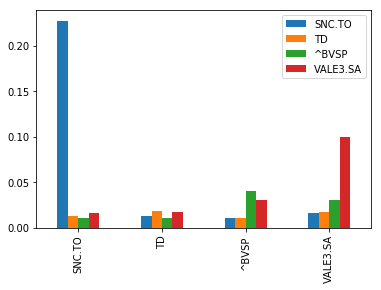

In [29]:
cov_returns.plot(kind='bar')

In [30]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,1.000000,0.199806,0.128757,0.123833
TD,0.199806,1.000000,0.409263,0.404264
^BVSP,0.128757,0.409263,1.000000,0.482650
VALE3.SA,0.123833,0.404264,0.482650,1.000000


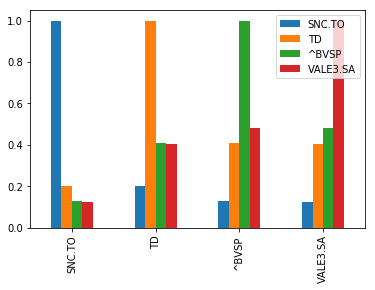

In [31]:
cor_returns.plot(kind='bar')

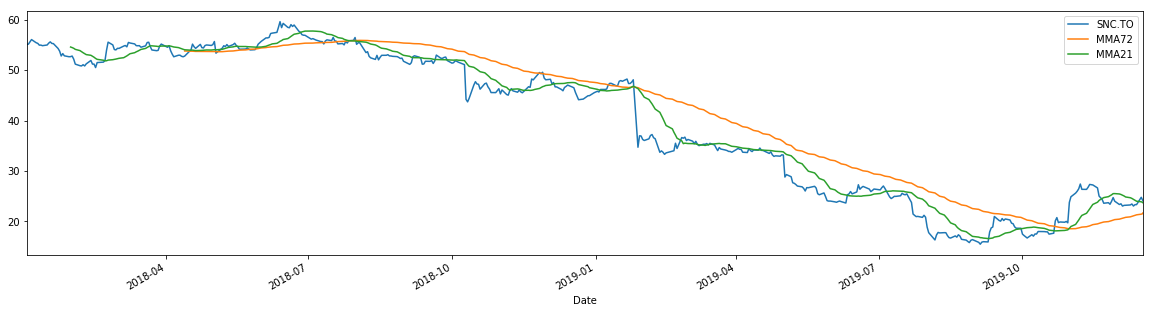

In [22]:
df['SNC.TO'].plot(figsize=(20,5))
df['SNC.TO'].rolling(72).mean().plot(label='MMA72')
df['SNC.TO'].rolling(21).mean().plot(label='MMA21')

plt.legend()

plt.show()